# Лабораторная работа №3

*(Вариант №3)*



## Задание 1

С помощью критерия согласия пирсона  $\chi^2$  проверить согласованность суммарного результата трех экзаменов с нормальным законом.





$F$ - неизвестное распределение из которого взята исследуемая выборка.

$$
\delta=\begin{cases}
H_0,\quad F \sim N(\mu,\sigma)\\
H_1,\quad F \nsim N(\mu,\sigma)
\end{cases}
$$

Критерий пирсона:

$$\rho(\vec{X})=\sum\limits_{i=1}^{k} \frac{(v_i -np_i)^2}{np_i}$$

$$
\delta=\delta(\vec{X})=\begin{cases}
H_0,\quad \rho(\vec{X})< C\\
H_1,\quad \rho(\vec{X}) \geq C
\end{cases}
$$

$C : \alpha = \mathbb{P}(\chi^2_{k-1} \geq C)$

$\alpha$ - допустимый уровень ошибки первого рода

$v_i$ - наблюдаемые в выборке частоты

$p_i$ - теоретические частоты из предполагаемого распределения

$n$ - размер выборки

Ошибка первого рода - приняли $H_1$ хотя верно $H_0$

Ошибка второго рода - приняли $H_0$ хотя верно $H_1$

$p_{value}$ - вероятность получить наблюдаемое значение статистики теста $\rho$ или более экстремальное значение, если нулевая гипотеза верна

#### Формализация гипотез:

- Нулевая гипотеза ($H_0$): Суммарный результат трех экзаменов имеет нормальное распределение $N(\mu, \sigma)$.
- Альтернативная гипотеза ($H_1$): Суммарный результат трех экзаменов не имеет нормального распределения $N(\mu, \sigma)$.

--- Метод, реализованный самостоятельно ---
Принимаем гипотезу H0
Статистика Хи-квадрат: 14.415948378926323
Р-значение: 0.10827939596695013
--- Готовая реализация метода ---
Принимаем гипотезу H0
Статистика Хи-квадрат: 5.710419383440524
Р-значение: 0.7685143263226116


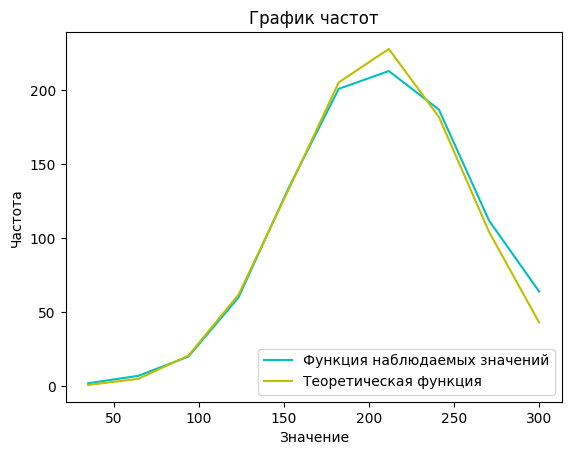

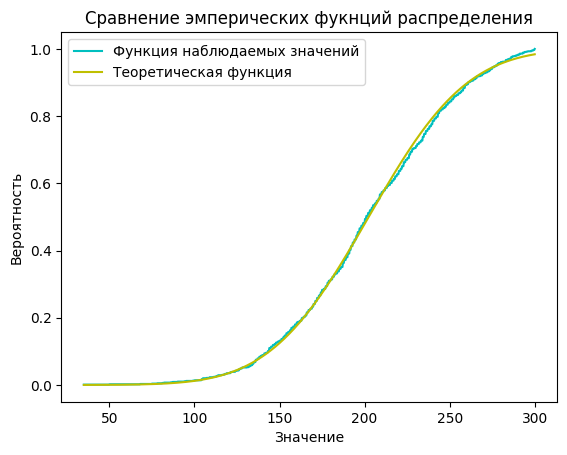

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


data = pd.read_csv("exams_dataset.csv")
random_variable = data["math score"] + data["reading score"] + data["writing score"]
alpha = 0.05

average_sample = np.mean(random_variable)
sd_sample = np.std(random_variable, ddof=1)

n = int(1 + np.log2(len(random_variable))) # по стерджессу
intervals = np.linspace(random_variable.min(), random_variable.max(), n + 1)
cumul_distr_func = stats.norm.cdf(intervals, loc=average_sample, scale=sd_sample)
theoretical_frequencies = (cumul_distr_func[1:] - cumul_distr_func[:-1]) * len(random_variable)
real_frequencies, _ = np.histogram(random_variable, bins=intervals, density=False)
chi_value = sum((real_frequencies - theoretical_frequencies)**2 /  theoretical_frequencies)
p_value = 1 - stats.chi2.cdf(chi_value, df = n - 1)


print("--- Метод, реализованный самостоятельно ---")
if p_value > 0.05:
    print("Принимаем гипотезу H0")
else:
    print("Отклоняем гипотезу H0")
print(f'Статистика Хи-квадрат: {chi_value }\nР-значение: {p_value}')

# Готовая реализаяция критерия Хи-квадрат

statistic, p_value1, _, _ = stats.chi2_contingency([real_frequencies, theoretical_frequencies])

print("--- Готовая реализация метода ---")
if p_value1 > 0.05:
    print("Принимаем гипотезу H0")
else:
    print("Отклоняем гипотезу H0")
print(f'Статистика Хи-квадрат: {statistic }\nР-значение: { p_value1 }')

# График частот


x_values = np.linspace(random_variable.min(), random_variable.max(), len(real_frequencies))

plt.plot(x_values, real_frequencies, label="Функция наблюдаемых значений", color="c")
plt.plot(x_values, theoretical_frequencies, label="Теоретическая функция", color="y")
plt.title("График частот")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.legend()
plt.show()

# График эмперических функций распределения

x_values = np.linspace(random_variable.min(), random_variable.max(), len(random_variable))
compute = lambda x : np.sum(random_variable <= x) / len(random_variable)

real_values = [compute(x) for x in x_values]
theoretical_values = stats.norm.cdf(x_values, loc=average_sample, scale=sd_sample)

plt.plot(x_values, real_values, label="Функция наблюдаемых значений", color="c")
plt.plot(x_values, theoretical_values, label="Теоретическая функция", color="y")
plt.title("Сравнение эмперических фукнций распределения")
plt.xlabel("Значение")
plt.ylabel("Вероятность")
plt.legend()
plt.show()

## Задание 2

С помощью критерия однородности $\chi^2$ проверить однородность результатов за письменную часть и математику.



$F$ - неизвестное распределение из которого взята исследуемая выборка.

$$
\delta=\begin{cases}
H_0,\quad F_1 \sim F_2\\
H_1,\quad F_1 \nsim F_2
\end{cases}
$$

Критерий:

$$
\rho(\vec{X})=\sum\limits_{i=1}^{2} \sum\limits_{j=1}^k \frac{( v_{ij}-n_ip_j)^2}{n_ip_j}
$$


Так как теоретические частоты неизвестны, оценим их на объединенной выборке:

$n=n_1+n_2$

$p_j=\frac{v_j}{n}$

$v_j=\sum\limits_{i=1}^2 v_{ij}$

$$
\rho(\vec{X})=n\sum\limits_{i=1}^{2} \sum\limits_{j=1}^k \frac{(n_{ij}-\frac{n_iv_j}{n})^2}{n_iv_j}=n_1n_2\sum\limits_{j=1}^k \frac{1}{v_{1j}+v_{2j}}\left(\frac{v_{1j}}{n_1}- \frac{v_{2j}}{n_2}\right)^2
$$

$$
\delta=\delta(\vec{X})=\begin{cases}
H_0,\quad \rho(\vec{X})< C\\
H_1,\quad \rho(\vec{X}) \geq C
\end{cases}
$$

$n_1,n_2$ - размеры сравниваемых выборок

$v_{ij}$ - количество элементов $i$-той выборки в $j$-том интервале

$k$ - количество интервалов

#### Формализация гипотез:

- Нулевая гипотеза ($H_0$): Результат за математику однороден с результатом по письменной части.
- Альтернативная гипотеза ($H_1$): Результат за математику неоднороден с результатом по письменной части.

--- Метод, реализованный самостоятельно ---
Принимаем гипотезу H0
Статистика Хи-квадрат: 15.692542807783962
Р-значение: 0.07358638329819378
--- Готовая реализация метода ---
Отклоняем гипотезу H0
Статистика Стьюдента: -2.724501579291243
Р-значение: 0.006495970853269461


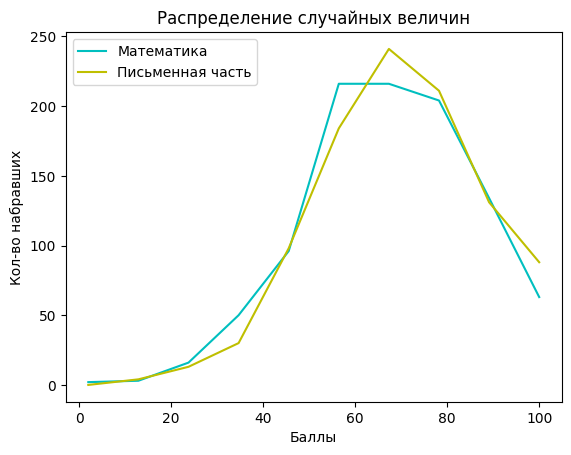

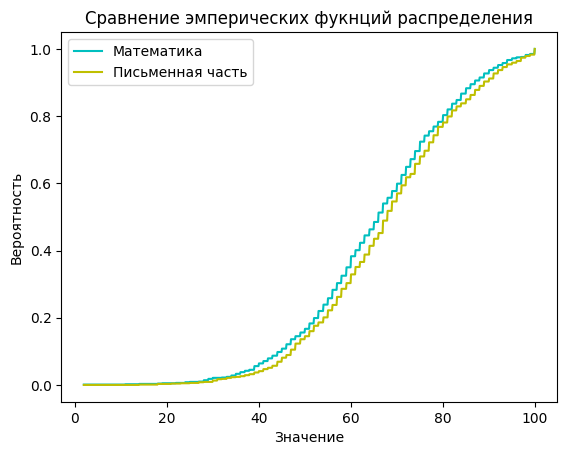

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2, ttest_ind

data = pd.read_csv("exams_dataset.csv")
first_variable = data["math score"]
second_variable = data["writing score"]
alpha = 0.05

n = int(1 + np.log2(len(first_variable))) # по стерджессу

left = min(first_variable.min(),second_variable.min())
right = max(first_variable.max(),second_variable.max())

first_grouped, _ = np.histogram(first_variable, bins=n, range=(left, right))
second_grouped, _ = np.histogram(second_variable, bins=n, range=(left, right))

chi_value = len(first_variable) * len(second_variable) * np.sum(1 / (first_grouped + second_grouped) * (first_grouped / len(first_variable) - second_grouped / len(second_variable))**2)
p_value = 1 - chi2.cdf(chi_value, df = n - 1)

print("--- Метод, реализованный самостоятельно ---")
if p_value > 0.05:
    print("Принимаем гипотезу H0")
else:
    print("Отклоняем гипотезу H0")
print(f'Статистика Хи-квадрат: {chi_value }\nР-значение: {p_value}')


# Готовая реализация критерия Стьюдента

statistic, p_value1 = ttest_ind(a=first_variable, b=second_variable)

print("--- Готовая реализация метода ---")
if p_value1 > 0.05:
    print("Принимаем гипотезу H0")
else:
    print("Отклоняем гипотезу H0")
print(f'Статистика Стьюдента: {statistic }\nР-значение: { p_value1 }')

plt.plot(np.linspace(left, right, len(first_grouped)), first_grouped, label="Математика", color='c')
plt.plot(np.linspace(left, right, len(first_grouped)), second_grouped, label="Письменная часть", color='y')
plt.xlabel("Баллы")
plt.ylabel("Кол-во набравших")
plt.title("Распределение случайных величин")
plt.legend()
plt.show()

compute = lambda x, array : np.sum(x >= array) / len(array)
x_values = np.linspace(left, right, len(first_variable))
y_first = [compute(x, first_variable) for x in x_values]
y_second = [compute(x, second_variable) for x in x_values]

plt.plot(x_values, y_first, label="Математика", color='c')
plt.plot(x_values, y_second, label="Письменная часть", color='y')
plt.title("Сравнение эмперических фукнций распределения")
plt.xlabel("Значение")
plt.ylabel("Вероятность")
plt.legend()
plt.show()


## Задание 3

С помощью критерия независимости хи-квадрат проверить независимость наличия подготовительных курсов и суммарного результата трех экзаменов.

### Формализация гипотез:

- Нулевая гипотеза $(H_0)$: Переменные X и Y независимы
- Альтернативная гипотеза $(H_1)$: Переменные X и Y зависимы


####  Интервалы группировки

Введём:
- 2 интервала группировки $\Delta_1$ и $\Delta_2$ для значений $X$ и
- $m$ интервалов группировки $\nabla_1, \nabla_2, ..., \nabla_m$ для значений $Y$

####  Эмпирические частоты

$v_{ij} =$ число пар $(X_i, Y_i)$, попавших в $\Delta_i \times \nabla_j$

####  Частоты

- $v_i$ = число $X_i$, попавших в $\Delta_i$
- $v_j$ = число $Y_i$, попавших в $\nabla_j$


По формуле:
$$\rho(\overrightarrow{X}, \overrightarrow{Y}) = n\sum \limits_{i=1}^{2} \sum \limits_{j=1}^{k}\frac{(v_{ij}-\frac{(v_iv_j)}{n})^2}{v_iv_j} = n (\sum \limits_{i=1}^{2} \sum \limits_{j=1}^{k}(\frac{n^2_{ij}}{v_iv_j}) - 1)$$
где $n$ - общее количество наблюдений, $k$ - количество интервалов для переменной Y.

--- Метод, реализованный самостоятельно ---
Отклоняем гипотезу H0
Статистика Хи-квадрат: 68.2253414942524
Р-значение: 3.3893554629571554e-11
--- Готовая реализация метода ---
Отклоняем гипотезу H0
Статистика Хи-квадрат: 68.22534149425245
Р-значение: 3.3893577633141724e-11


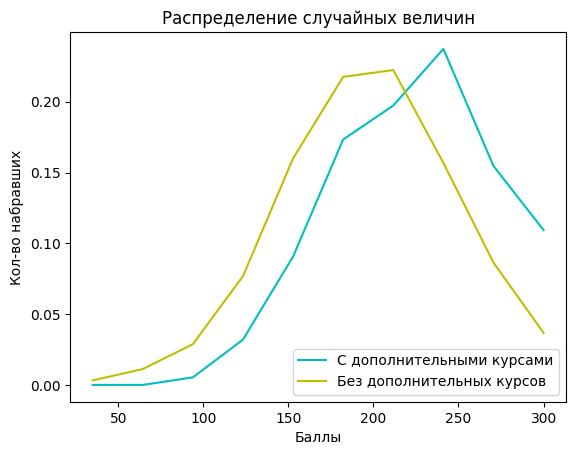

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2, chi2_contingency

data = pd.read_csv("exams_dataset.csv")
score = data["math score"] + data["reading score"] + data["writing score"]
test_preparation_course = [False if x == "none" else True for x in data["test preparation course"]]
alpha = 0.05

left = score.min()
right = score.max()

n = int(1 + np.log2(len(score))) # по стерджессу

with_course = np.array(0)
no_course = np.array(0)

for i in range(len(score)):
    if test_preparation_course[i]:
        with_course = np.append(with_course, score[i])
    else:
        no_course = np.append(no_course, score[i])
matrix = np.array([np.histogram(with_course, bins=n, range=(left, right))[0], np.histogram(no_course, bins=n, range=(left, right))[0]])

intermediate_sum = 0
for i in range(n):
    for j in range(2):
        intermediate_sum += matrix[j][i]**2 / (np.sum(matrix, axis=1)[j]) / (np.sum(matrix, axis=0)[i])

chi_value = len(score) * (intermediate_sum - 1)
p_value = 1 - chi2.cdf(chi_value, df = n - 1)

print("--- Метод, реализованный самостоятельно ---")
if p_value > 0.05:
    print("Принимаем гипотезу H0")
else:
    print("Отклоняем гипотезу H0")
print(f'Статистика Хи-квадрат: {chi_value }\nР-значение: {p_value}')

# Готовая реализаяция критерия Хи-квадрат

statistic, p_value1, _, _ = chi2_contingency(matrix)

print("--- Готовая реализация метода ---")
if p_value1 > 0.05:
    print("Принимаем гипотезу H0")
else:
    print("Отклоняем гипотезу H0")
print(f'Статистика Хи-квадрат: {statistic }\nР-значение: { p_value1 }')

x_values = np.linspace(left, right, len(matrix[0]))
plt.plot(x_values, matrix[0].astype(float) / np.sum(matrix[0]), label="С дополнительными курсами", color="c")
plt.plot(x_values, matrix[1].astype(float) / np.sum(matrix[1]), label="Без дополнительных курсов", color="y")
plt.xlabel("Баллы")
plt.ylabel("Кол-во набравших")
plt.title("Распределение случайных величин")
plt.legend()
plt.show()